# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [159]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [84]:
# Importing the file porter_data_1.csv
porter = pd.read_csv('porter_data_1.csv')
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [85]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter.created_at = pd.to_datetime(porter.created_at)
porter.actual_delivery_time = pd.to_datetime(porter.actual_delivery_time)

In [86]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [87]:
# Convert categorical features to category type
porter.store_primary_category = porter.store_primary_category.astype('category')
porter.order_protocol = porter.order_protocol.astype('category')
porter.market_id = porter.market_id.astype('category')

In [88]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [89]:
# Calculate time taken in minutes
porter['time_taken'] = porter.actual_delivery_time - porter.created_at
porter['time_taken'] = porter['time_taken'].dt.total_seconds()/60
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [90]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['created_hour'] = porter.created_at.dt.hour
porter['day_of_week'] = porter.created_at.dt.weekday+1
# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter.day_of_week.apply(lambda x: 1 if x in [6,7] else 0)
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  created_hour  day_of_week  \
0                      21.0     34.44        47.0            22            5   
1                       2.0     27.60        44.0            21            2   
2                      18.0     11.56        55.0             0            1   
3                       8.0     31.80        59.0             3            4   
4                       7.0      8.20        46.0             2            2   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [91]:
# Drop unnecessary columns
porter.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [92]:
# Define target variable (y) and features (X)
y = porter['time_taken']
X = porter.drop(['time_taken'], axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [109]:
# Split data into training and testing sets
df_train, df_test = train_test_split(porter, train_size = 0.8, test_size = 0.2, random_state = 100)

In [110]:
porter.shape

(175777, 16)

In [111]:
df_train.shape

(140621, 16)

In [112]:
df_test.shape

(35156, 16)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [97]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_vars = [ 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week',
       'isWeekend']
cat_vars = ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

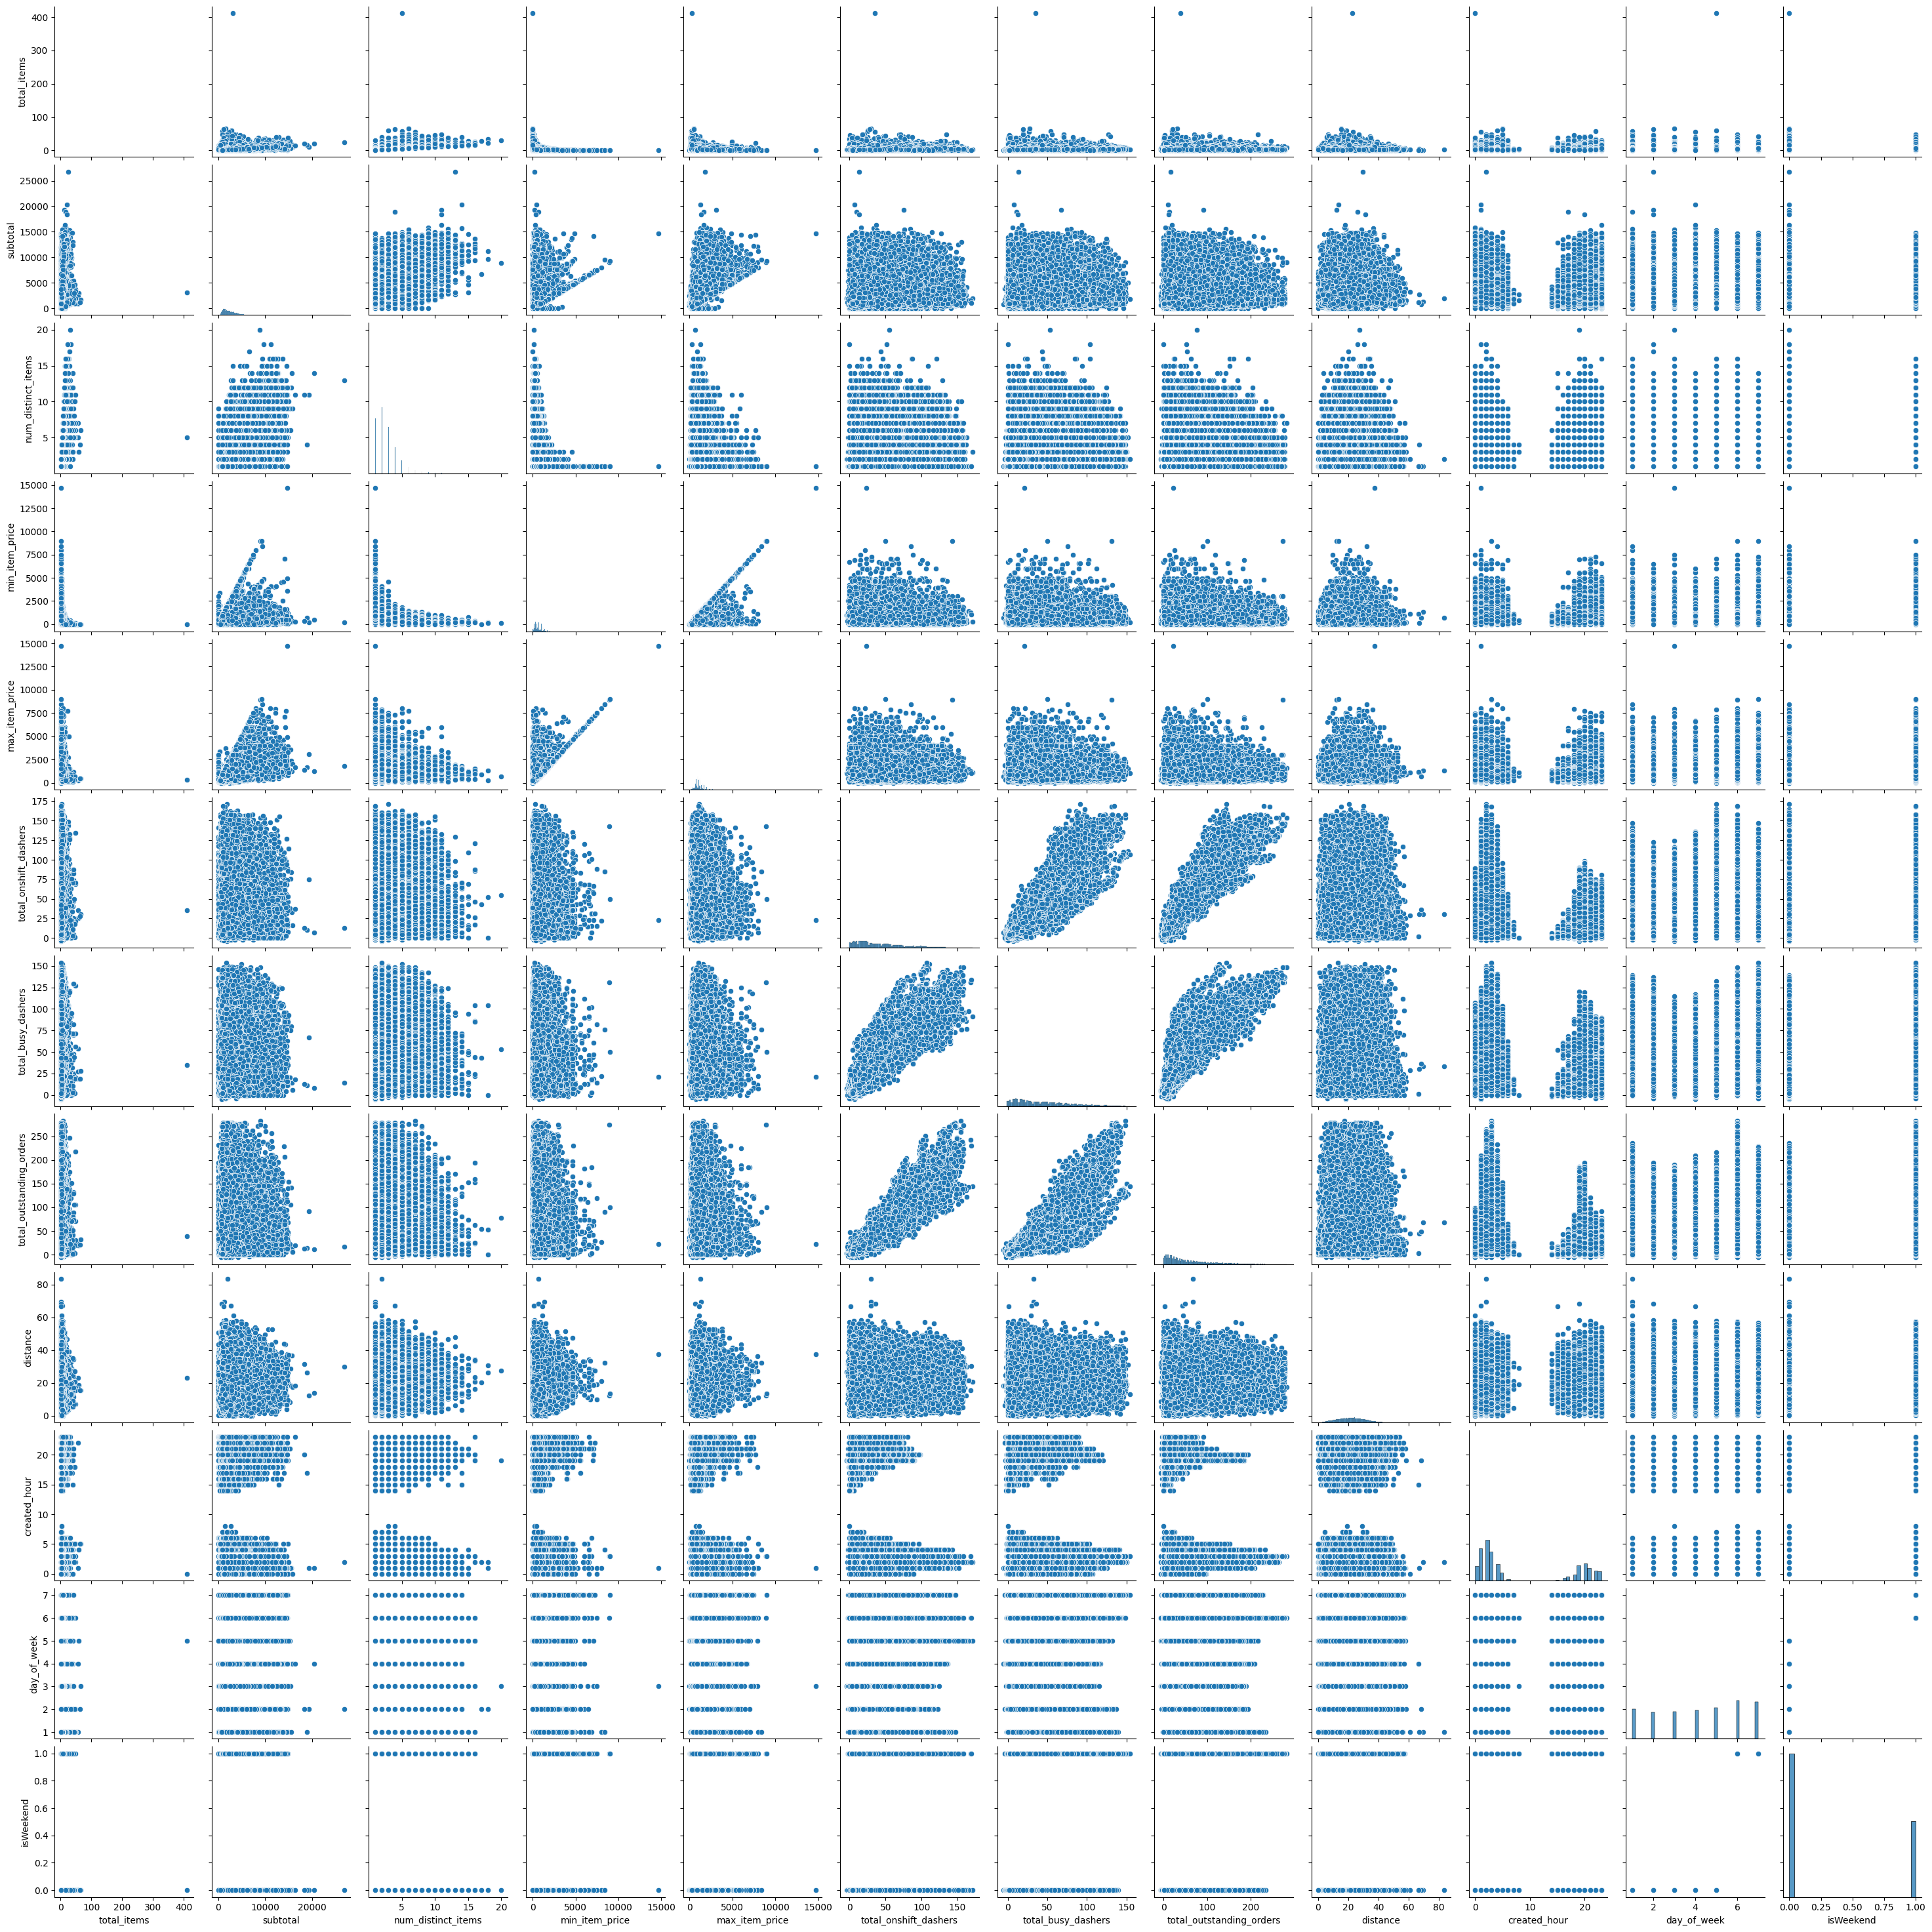

In [98]:
# Plot distributions for all numerical columns
sns.pairplot(df_train[num_vars])
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

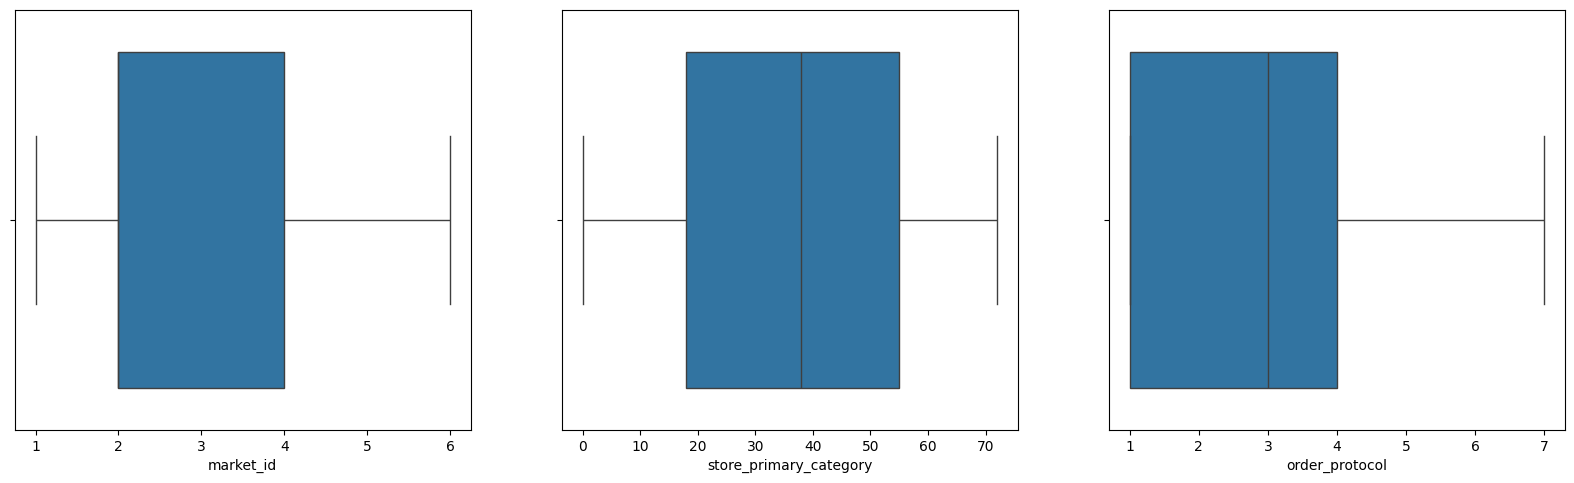

In [99]:
# Distribution of categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'market_id', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'store_primary_category', data = df_train)
plt.subplot(2,3,3)
sns.boxplot(x = 'order_protocol',  data = df_train)
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [100]:
# Distribution of time_taken
sns.histplot(df_train.time_taken, kde=True)
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [101]:
# Scatter plot to visualise the relationship between time_taken and other features
sns.pairplot(df_train, y_vars='time_taken')
plt.show()


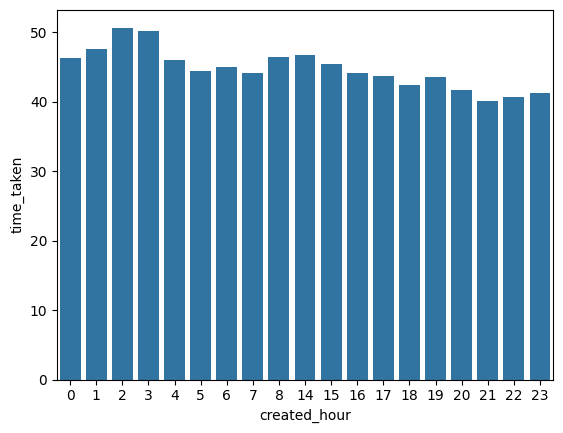

In [102]:
# Show the distribution of time_taken for different hours
sns.barplot(data=df_train, x='created_hour', y='time_taken', errorbar=None)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

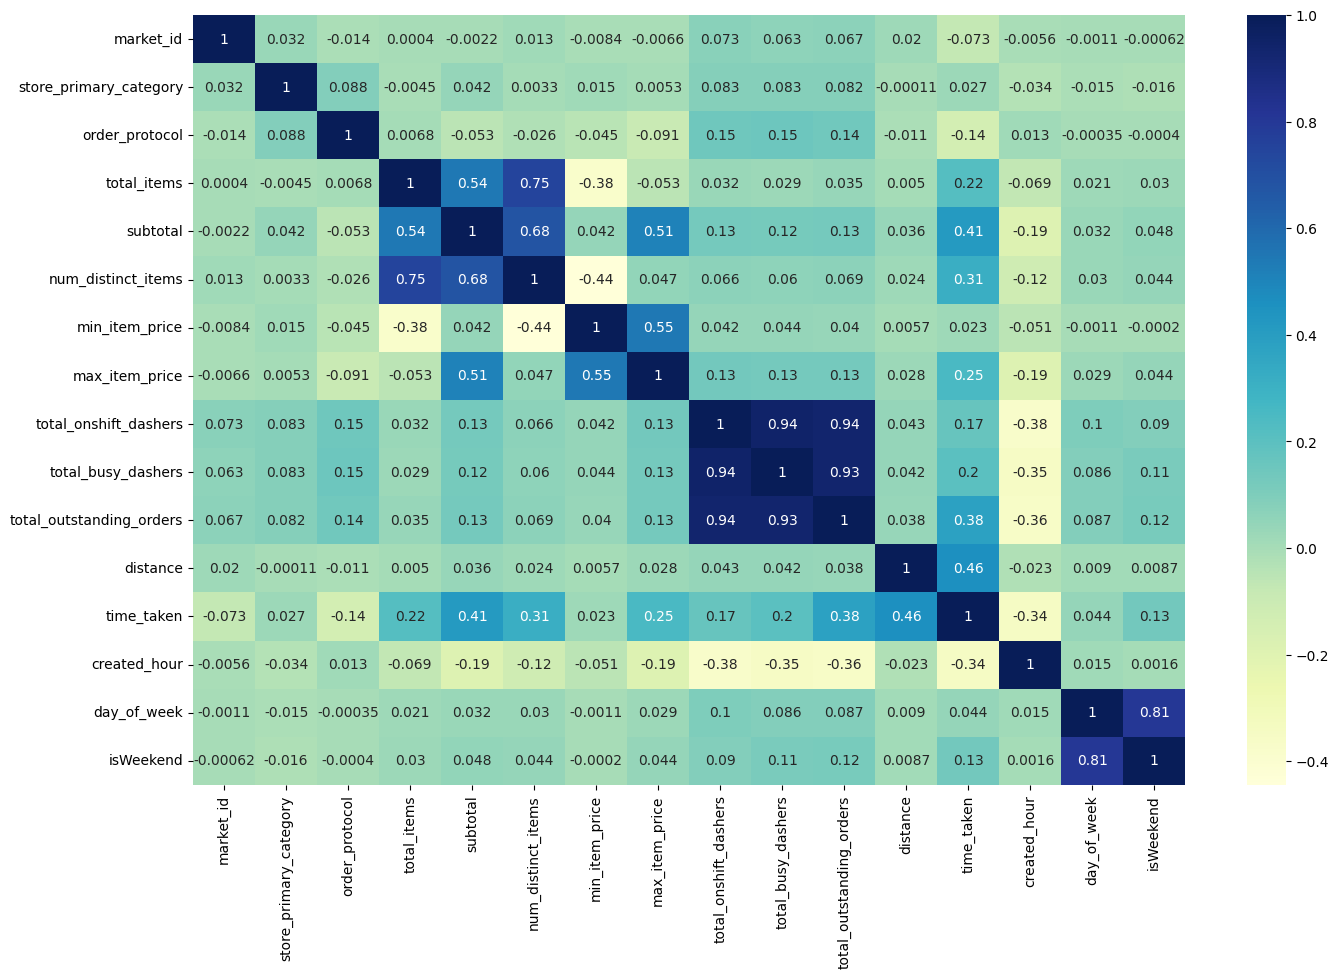

In [114]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [116]:
# Drop 3-5 weakly correlated columns from training dataset
df_train.drop(['min_item_price','store_primary_category','day_of_week', 'market_id'], axis=1, inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [128]:
# Boxplot for time_taken
sns.boxplot(data=df_train, x='time_taken')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [124]:
# Handle outliers

plt.figure(figsize=(5, 3))
sns.boxplot(x = 'created_hour', data = df_train)
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [125]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_vars = [ 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'day_of_week',
       'isWeekend']
cat_vars = ['market_id', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [126]:
# Plot distributions for all numerical columns

sns.pairplot(df_test[num_vars])
plt.show()

##### **4.1.2**
Check the distribution of categorical features

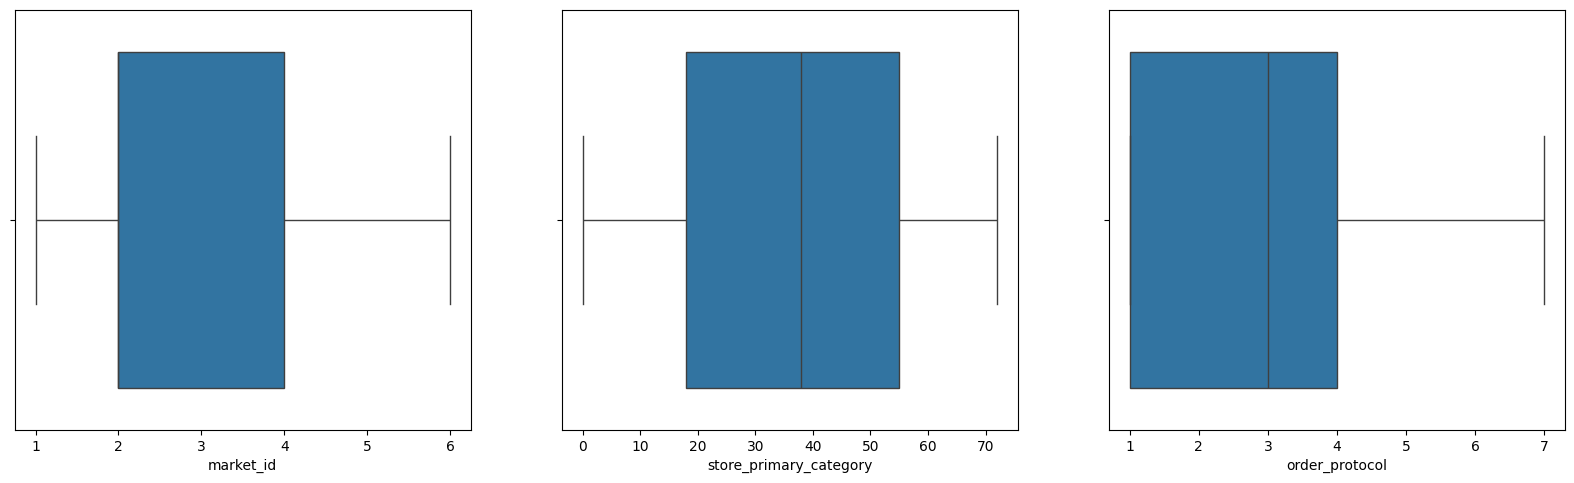

In [127]:
# Distribution of categorical columns
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'market_id', data = df_test)
plt.subplot(2,3,2)
sns.boxplot(x = 'store_primary_category', data = df_test)
plt.subplot(2,3,3)
sns.boxplot(x = 'order_protocol',  data = df_test)
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

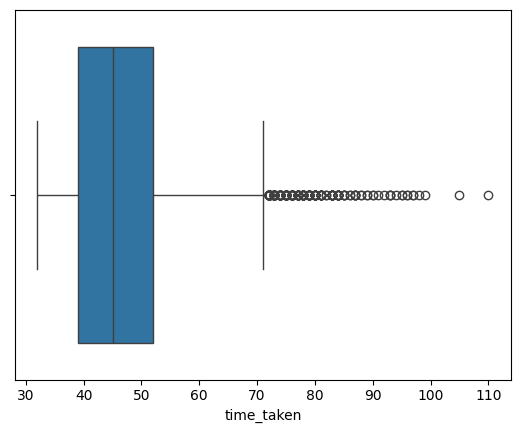

In [130]:
# Distribution of time_taken
sns.boxplot(data=df_test, x='time_taken')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

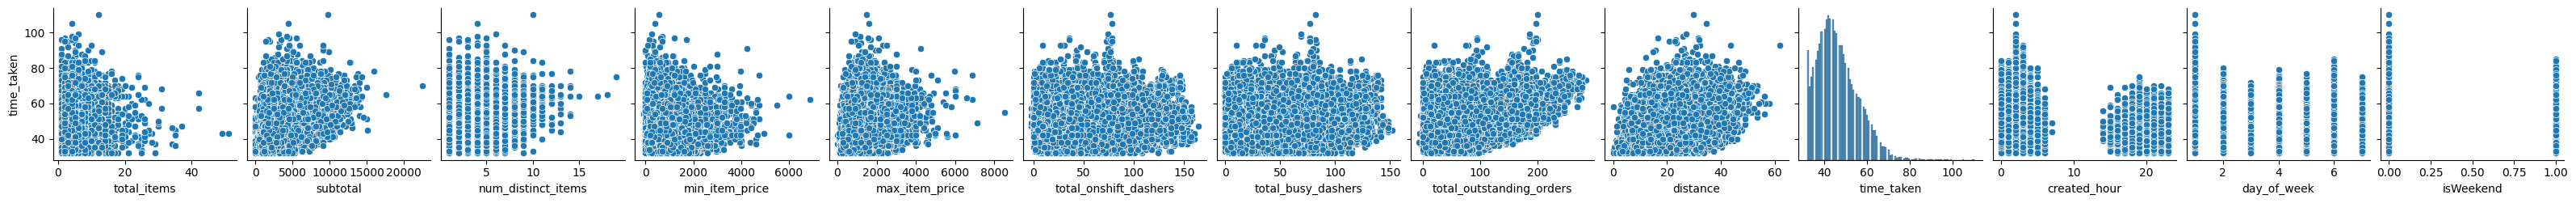

In [131]:
# Scatter plot to visualise the relationship between time_taken and other features
sns.pairplot(df_test, y_vars='time_taken')
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [132]:
# Drop the weakly correlated columns from training dataset
df_test.drop(['min_item_price','store_primary_category','day_of_week', 'market_id'], axis=1, inplace=True)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [148]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [136]:
scaler = MinMaxScaler()

In [137]:
# Apply scaling to the numerical columns
scale_vars = ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'created_hour']
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [138]:
df_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111         0.166667     0.000000  0.050373            0.000000   
58452         0.666667     0.009756  0.159888            0.210526   
20644         0.166667     0.012195  0.294030            0.105263   
79735         0.166667     0.004878  0.136567            0.105263   
167933        0.666667     0.009756  0.319963            0.210526   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111         0.091837               0.154286            0.157233   
58452         0.061224               0.662857            0.660377   
20644         0.098639               0.480000            0.528302   
79735         0.098639               0.748571            0.698113   
167933        0.178571               0.274286            0.308176   

        total_outstanding_orders  distance  time_taken  created_hour  \
42111                   0.086505  0.114943    0.000000      0.869565   
58452                   0.737024  0.413793    0.549296      0.086957   
20644                   0.418685  0.418103    0.422535      0.130435   
79735                   0.619377  0.308429    0.309859      0.086957   
167933                  0.231834  0.212165    0.338028      0.086957   

        isWeekend  
42111           0  
58452           1  
20644           0  
79735           1  
167933          0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [142]:
# Create/Initialise the model
y_train = df_train.pop('time_taken')
X_train = df_train

In [143]:
# Train the model using the training data
# Add a constant
X_train_lm = sm.add_constant(X_train)

In [145]:
# Make predictions
lr = sm.OLS(y_train, X_train_lm).fit()

In [147]:
# Find results for evaluation metrics
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 8.758e+04
Date:                Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:36:30   Log-Likelihood:             2.3083e+05
No. Observations:              140621   AIC:                        -4.616e+05
Df Residuals:                  140609   BIC:                        -4.615e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [149]:
# Loop through the number of features and test the model
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)
rfe = rfe.fit(X_train, y_train)

In [150]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('order_protocol', np.False_, np.int64(3)),
 ('total_items', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_onshift_dashers', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.False_, np.int64(2)),
 ('isWeekend', np.False_, np.int64(4))]

In [151]:
col = X_train.columns[rfe.support_]
col

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

In [152]:
# Build the final model with selected number of features
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [164]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 7.561e+04
Date:                Mon, 07 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:31:19   Log-Likelihood:             2.0323e+05
No. Observations:              140621   AIC:                        -4.064e+05
Df Residuals:                  140612   BIC:                        -4.063e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [157]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
y_train_time_taken = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

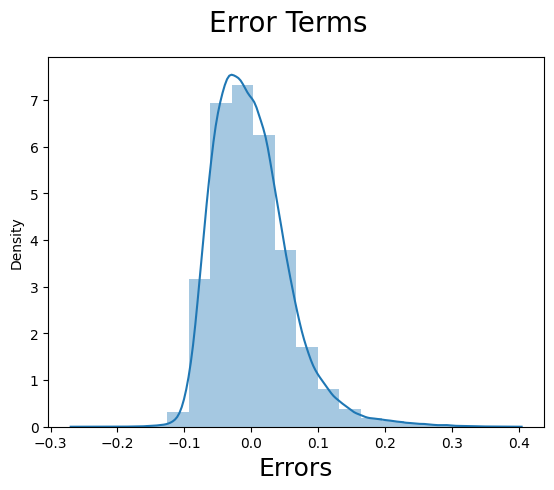

In [160]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_time_taken), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

[Your inferences here:]

The sum of errors are centred around 0 and follow normal distribution.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


#### Compare the scaled vs unscaled features used in the final model
The only unscaled feature used was "isWeekend", since it was categorical and hence, we did not change it's value. We used MinMaxScaler where values were between 0 and 1, and for isWeekend we had only 2 values 0 & 1.


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

#### Analyze the effect of a unit change in a feature, say 'total_items'
Coefficient of total_items is -0.3464 and hence, change in unit change of the feature will change the factor by  -0.3464.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>'market_id', 'store_primary_category', 'order_protocol', and 'isWeekend' -  These were the categorical variables that we had but out of these after RFE we concluded that none of the variables impact the dependent variable.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It indicates that out of total data records present, 80% from the dataset would be used for training the model and remaining 20% to test the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>'distance' has the highest correlation with target variable 'time_taken'



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We detected outliers using boxplot and since, they were not very significant, removed those rows.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>'total_outstanding_orders', 'distance', and 'subtotal' are most significant features based on the t-statistic.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>It is used to check the relationship between dependent and independent variables.
>Based on the correlation with target variables, predictor variable can be predicted with what accuracy.
>It is defined by y = β0 + β1 x1 + β2 x2 +⋯+βn xn +ε



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression - Used to predict target variable only using one feature and is given by  y = β0 + β1 x1 + ε
>Multiple linear regression - Used to predict target variable using multiple features and is given by  y = β0 + β1 x1 + β2 x2 +⋯+βn xn +ε



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures the error between predicted and actual values, and it is minimized using gradient descent or analytical solutions to find the best-fitting line.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns noise and performs well on training data but poorly on new data, while underfitting happens when a model is too simple to capture the underlying patterns in the data.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose a linear regression model by showing whether errors are randomly distributed—indicating a good fit—or if patterns exist, suggesting issues like non-linearity or heteroscedasticity.